# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Loading Data

In [2]:
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")

In [3]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(60000, 785)

This means that there are 60000 images of different digits in this dataset.

# Understanding the Data

Lets take the first row (0th row) and second row (1st row) and all the columns except the 1st column i.e. the label column and store the pixels in form of an array which then we will use to convert to images.

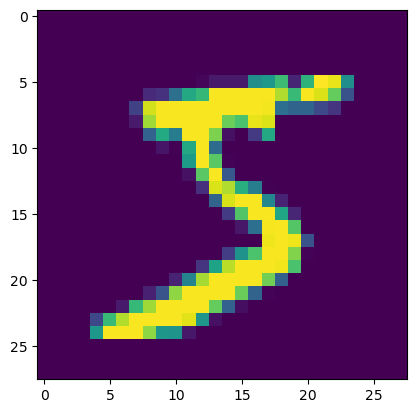

In [5]:
# First Row
num = np.array(train.iloc[0, 1:]).reshape(28, 28)
plt.imshow(num) # converts array to image
plt.show()
# as given in the label column for 0th row it shows 5

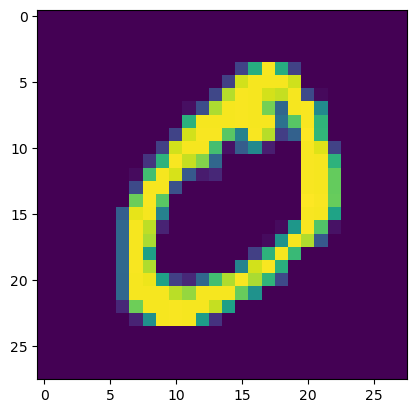

In [6]:
# Second row
# First Row
num = np.array(train.iloc[1, 1:]).reshape(28, 28)
plt.imshow(num) # converts array to image
plt.show()
# as given in the label column for 1st row it shows 0

Now lets take a random row, taking the 3rd row now and plot a histogram for it.

(array([695.,   7.,   8.,   4.,   4.,   2.,   4.,   5.,   8.,  47.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

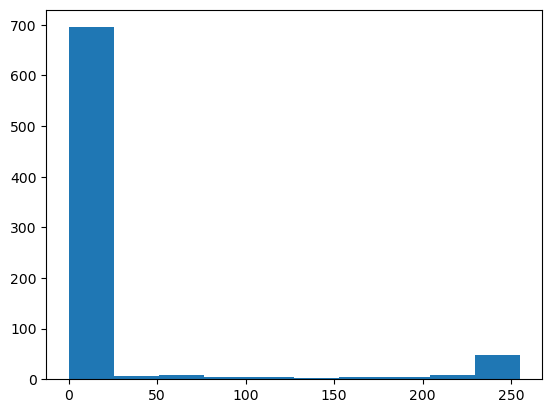

In [7]:
arr = train.iloc[3, 1:]
plt.hist(arr)

In [8]:
max(arr)

255

<p>We see that the values range from 0 to 255. This means that there are a total of 256 integers here which is (2^8). Now every colour on this planet can be represented as a combination of RGB (red, green, blue), just with different intensities. So here 256 represents intensity. Let R, G, B are 3 channels. And in the image every channel is mixed in certain proportions goverened in the range of 0-255. In microsoft, image shape is generally (28 * 28) but in python it is (28 * 28 * 3). This is because we have 3 matrices of sizes (28 * 28) superimposed on each other. These matrices are the 3 channels.</p>
<p>Now the question is what if the image is not an RGB image but a grayscale image. Ina grayscale image, there is only 1 channel i.e. in both microsoft and python, the size of image would be (28 * 28). In this channel, any pixel can assume the value between 0-255 where 0 - perfect black, 255 - perfect white and 128 - mid gray.</p>

# DataPreprocessing

In [9]:
train.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

So there are no null values found.

# Feature Engineering in Images

<p>I can add new images like rotating a digit a bit or tilting it a bit (shearing) or zooming it or shift its height just to make the model more robust since to naked eye, all these images will still be a single digit but computer would treat as different cases. </p>
<p>I will use a library keras and import from it the ImageDataGenerator which takes input in the form of (a, x, y, z).</p>

In [30]:
x = np.array(train)
y = np.array(test)
x_train = x[:,1:]
y_train = x[:,0]
x_test = y
x_test = x_test[:, :784]

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
x_train = x_train.reshape(-1, 28, 28, 1) # here -1 tells numpy to figure out the suitable value by itself
datagen = ImageDataGenerator(rotation_range = 15, height_shift_range = 0.1, zoom_range = 0.1, shear_range = 0.1)
datagen.fit(x_train)

In [18]:
x_train = x_train.reshape(-1, 784)

# Model Implementation

I have used the KNN algorithm for this purpose.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [31]:
int(knn.predict(x_test[100].reshape(1, -1)))

C:\Users\HP PC\AppData\Local\Temp\ipykernel_60316\3307146802.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(knn.predict(x_test[100].reshape(1, -1)))


6

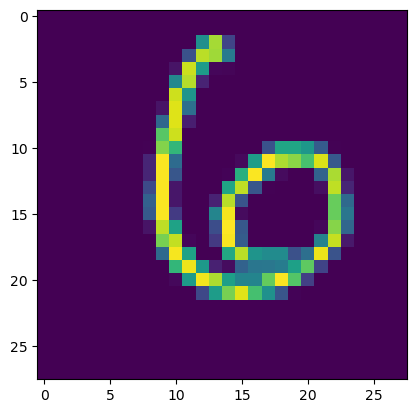

In [35]:
# now lets check if the prediction is right.
num = np.array(test.iloc[100, 1:]).reshape(28, 28)
plt.imshow(num) # converts array to image
plt.show()

In [33]:
#checking one more time
int(knn.predict(x_test[101].reshape(1, -1)))

C:\Users\HP PC\AppData\Local\Temp\ipykernel_60316\2329501092.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(knn.predict(x_test[101].reshape(1, -1)))


0

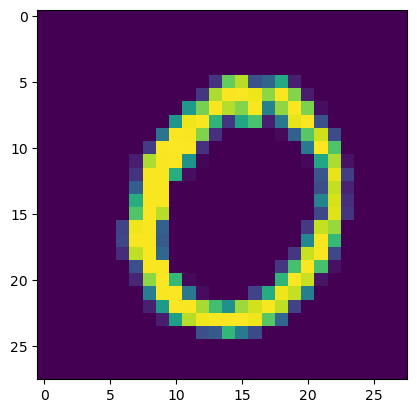

In [36]:
# now lets check if the prediction is right.
num = np.array(test.iloc[101, 1:]).reshape(28, 28)
plt.imshow(num) # converts array to image
plt.show()

In [37]:
#checking one more time
int(knn.predict(x_test[169].reshape(1, -1)))

C:\Users\HP PC\AppData\Local\Temp\ipykernel_60316\2753750604.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(knn.predict(x_test[169].reshape(1, -1)))


4

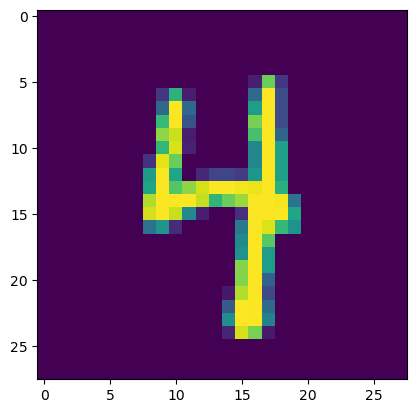

In [38]:
# now lets check if the prediction is right.
num = np.array(test.iloc[169, 1:]).reshape(28, 28)
plt.imshow(num) # converts array to image
plt.show()